In [1]:
from nbconfig import configure_path
configure_path()

In [2]:
import numpy as np
from sklearn.metrics import classification_report
from src.models.hypernnclassifier import HyperNNClassifier
from src.utils import plot_boxes
import src.torchsetup as tsetup

In [3]:
SEED = 5
tsetup.set_seeds(SEED)
DEVICE = tsetup.set_device(cuda=True)

In [4]:
X = np.array([[1,1], [3,3], [4,4], [10,10]])
y = np.array([1, 0, 1, 0])

In [5]:
X = (X - np.mean(X)) / np.std(X)

In [6]:
clf = HyperNNClassifier(
    nboxes=2,
    dim=X.shape[1],
    epochs=10000,
    lr=0.001,
    l2_reg=0.0001,
    early_stopping_patience=3000,
    class_weights=None,
    overlap_reg=0.0,
    tau=0.5,
    alpha=0.5,
    tau_decay=0.99,
    alpha_decay=0.99,
    decay_step=10,
    verbosity=100,
    verbose=False,
    device=DEVICE,
    random_state=SEED)

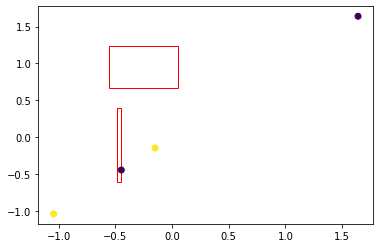

In [7]:
plot_boxes(clf, X, y)

In [8]:
clf.fit(X, y)

  0%|          | 0/10000 [00:00<?, ?it/s]

Early stop at epoch 5020, with best loss found 8.818240894470364e-05


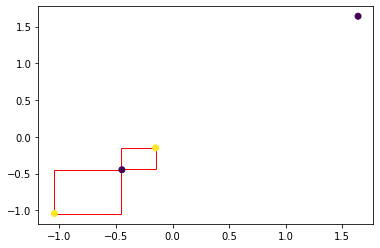

In [9]:
plot_boxes(clf, X, y)

In [10]:
y_pred = clf.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [11]:
clf.block.mins

Parameter containing:
tensor([[-1.0503, -1.0481],
        [-0.4566, -0.4410]], device='cuda:0', requires_grad=True)

In [12]:
clf.block.length

Parameter containing:
tensor([[0.5922, 0.5950],
        [0.3141, 0.2956]], device='cuda:0', requires_grad=True)